# Explore here

Importación de librerías


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

import warnings

Carga de archivo y visualización de las primeras líneas

In [ ]:


url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

df = pd.read_csv(url)

print(df.head())

print(df.info())

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [4]:
df.describe()

,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


Sumar datos nulos

In [6]:
df.isnull().sum()

date     0
sales    0
dtype: int64

Análisis del gráfico inicial

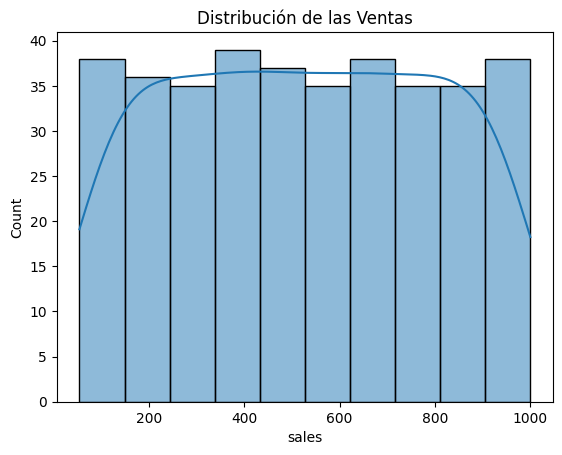

In [7]:
import seaborn as sns

sns.histplot(df['sales'], kde=True)
plt.title('Distribución de las Ventas')
plt.show()


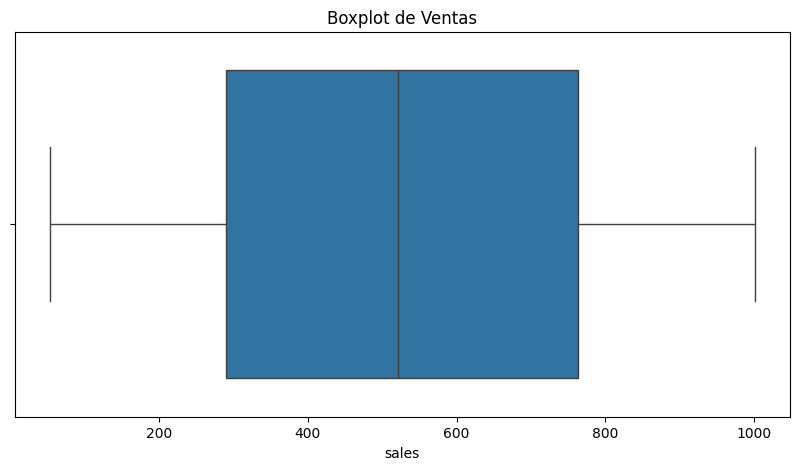

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x=df['sales'])
plt.title('Boxplot de Ventas')
plt.show()


In [9]:
print(df.index.duplicated().sum())

0


Convertimos la columna date en datetime para leerlo en formato de fecha. Si encuentra un valor no convertible, lo convierte en NaT (fecha nula) gracias al argumento errors='coerce'.



In [10]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

Comprobamos que datetime está correcto y sumamos los nulos.


In [11]:
print(df['date'].dtypes)            
print(df['date'].isnull().sum())   

datetime64[ns]
0


In [12]:
print(df.dtypes)

date     datetime64[ns]
sales           float64
dtype: object


Establecemos la columna 'date' como índice del DataFrame para trabajar la serie temporal correctamente.

In [13]:
df.set_index('date', inplace=True)

Extraemos el año y el mes del índice de fechas y los guardamos en nuevas columnas 'year' y 'month'.

In [14]:
df['year'] = df.index.year
df['month'] = df.index.month

Agrupamos las ventas por año, calculamos el promedio y lo grafica como un gráfico de barras.

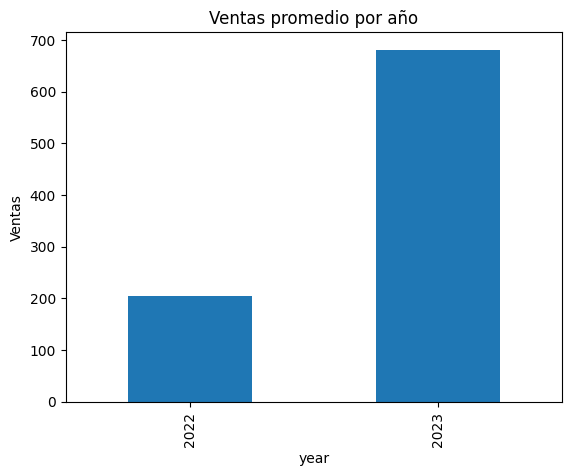

In [15]:
df.groupby('year')['sales'].mean().plot(kind='bar', title='Ventas promedio por año', ylabel='Ventas')
plt.show()

In [16]:
print(df.index.min(), df.index.max())

2022-09-03 17:10:08.079328 2023-09-03 17:10:08.079328


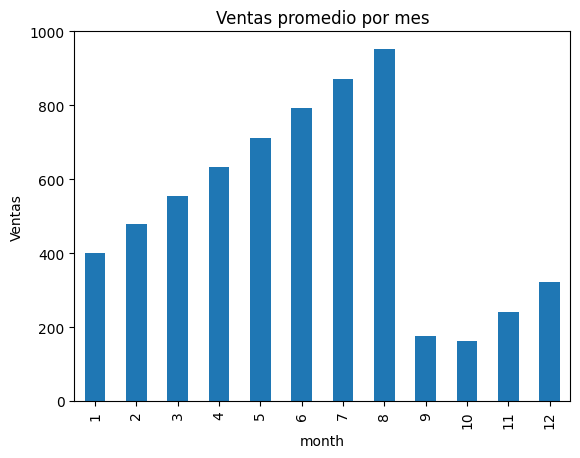

In [17]:
df.groupby('month')['sales'].mean().plot(kind='bar', title='Ventas promedio por mes', ylabel='Ventas')
plt.show()

Graficamos la serie de ventas

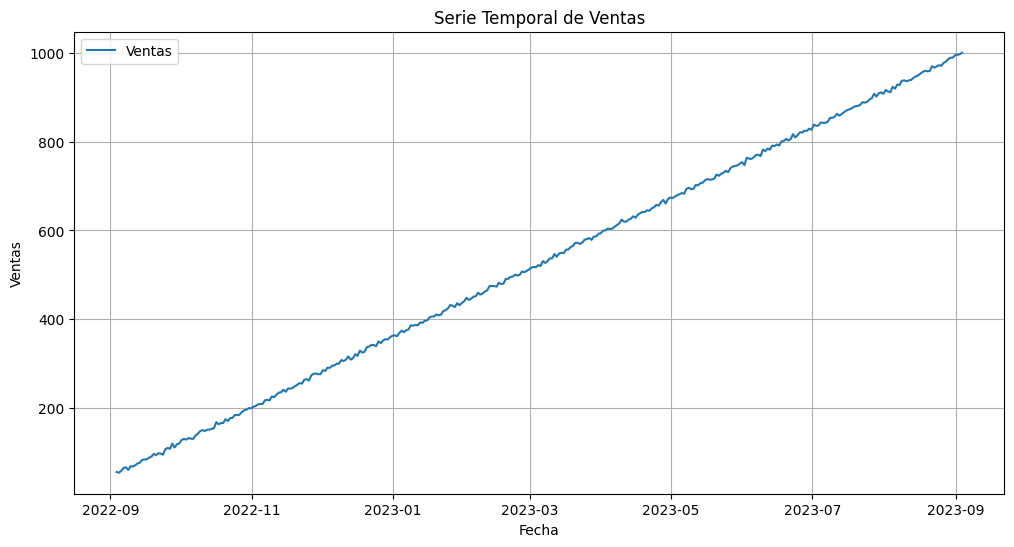

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['sales'], label='Ventas')
plt.title('Serie Temporal de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

Detectamos la frecuencia temporal

In [19]:
print(pd.infer_freq(df.index))

D


Extramos la columna ¨sales¨del df y la guardamos en la variable ts para usar la herramienta de pandas especializada para el modelo de ARIMA.

In [20]:

ts = df["sales"]
ts.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

Analizamos la tendencia y la serie temporal. Para ello separamos la sales en tendencia, esttacionalidad y ruido (Tren, seasonal y resid)

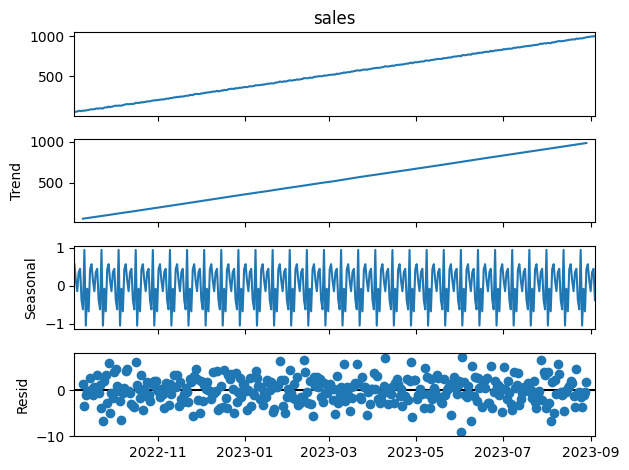

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['sales'], model='additive', period=12)

decomposition.plot()
trend = decomposition.trend


Graficamos la serie original y tendencia

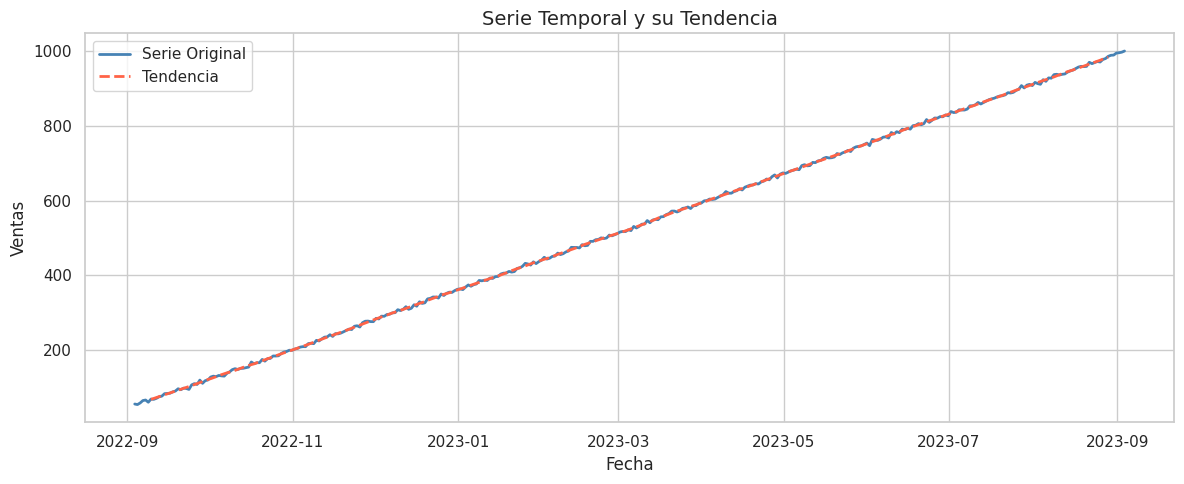

In [22]:
sns.set(style="whitegrid")

# Crear figura
fig, axis = plt.subplots(figsize=(12, 5))

# Serie original en azul suave
sns.lineplot(data=ts, label='Serie Original', color='steelblue', linewidth=2)

# Tendencia en rojo claro (si hay valores nulos, se interpolan visualmente)
sns.lineplot(data=trend, label='Tendencia', color='tomato', linewidth=2, linestyle='--')

# Títulos y leyenda
plt.title('Serie Temporal y su Tendencia', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()

plt.tight_layout()
plt.show()

Visualizamos un poquito más　❤️

<Axes: xlabel='date'>

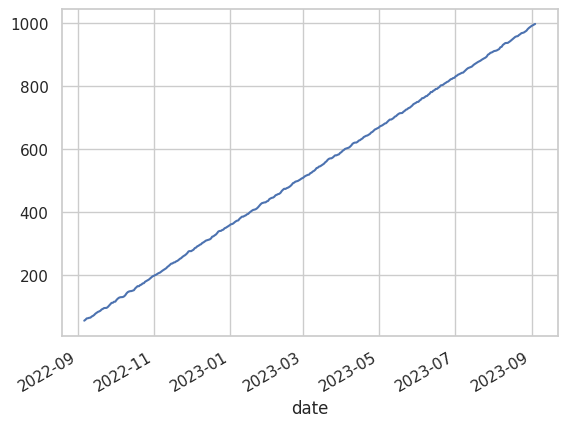

In [23]:
df['sales'].rolling(window=3).mean().plot(label='Tendencia suavizada')

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period = 24)
decomposition
decomposition.trend       # Componente de tendencia
decomposition.seasonal    # Componente estacional
decomposition.resid    

date
2022-09-03 17:10:08.079328   NaN
2022-09-04 17:10:08.079328   NaN
2022-09-05 17:10:08.079328   NaN
2022-09-06 17:10:08.079328   NaN
2022-09-07 17:10:08.079328   NaN
                              ..
2023-08-30 17:10:08.079328   NaN
2023-08-31 17:10:08.079328   NaN
2023-09-01 17:10:08.079328   NaN
2023-09-02 17:10:08.079328   NaN
2023-09-03 17:10:08.079328   NaN
Name: resid, Length: 366, dtype: float64

In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.545414193706378
p-value: 0.9861899815311064


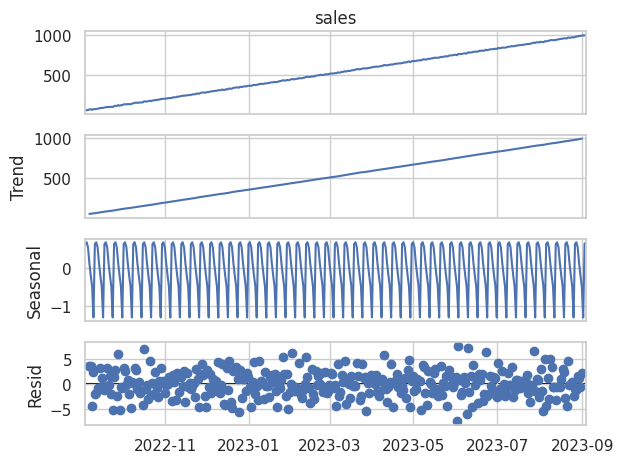

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['sales'], model='additive')
decomposition.plot()
plt.show()


Entrenamiento ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


train = df.iloc[:-12]
test = df.iloc[-12:]


In [ ]:
model = ARIMA(train['sales'], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  354
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1019.081
Date:                Thu, 08 May 2025   AIC                           2044.161
Time:                        11:52:26   BIC                           2055.761
Sample:                    09-03-2022   HQIC                          2048.777
                         - 08-22-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    593.845      0.000       0.997       1.003
ma.L1         -0.9992      0.689     -1.451      0.147      -2.349       0.351
sigma2        18.5995     12.879      1.444      0.1

Predicción

In [29]:
pred = model_fit.forecast(steps=12)
pred.index = test.index

In [30]:
from pmdarima import auto_arima
forecast = model.predict()
forecast


TypeError: Model.predict() missing 1 required positional argument: 'params'

Comparación visual

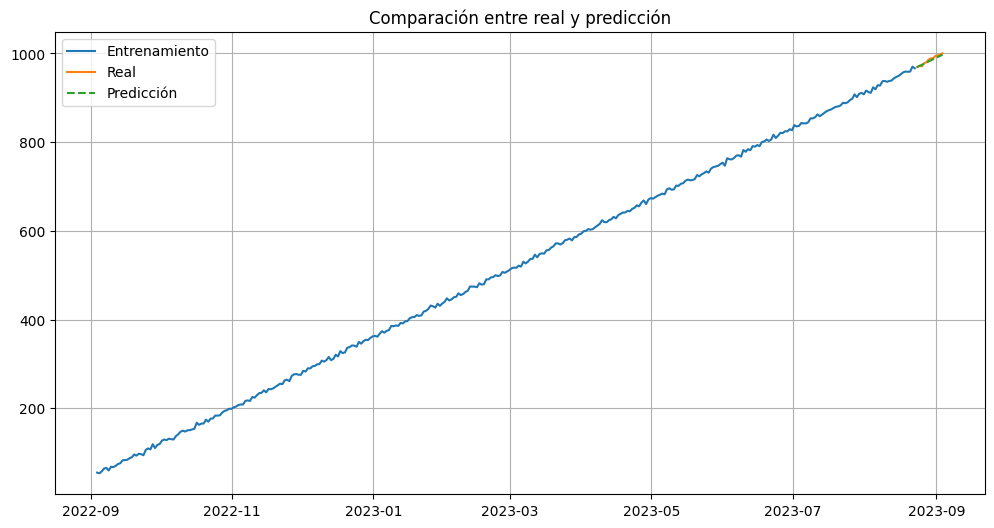

In [ ]:

plt.figure(figsize=(12,6))
plt.plot(train['sales'], label='Entrenamiento')
plt.plot(test['sales'], label='Real')
plt.plot(pred, label='Predicción', linestyle='--')
plt.legend()
plt.title('Comparación entre real y predicción')
plt.grid(True)
plt.show()

Medir error 

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['sales'], pred)
print(f'MSE: {mse:.2f}')

MSE: 9.27


In [ ]:
import pickle
with open('modelo_arima.pkl', 'wb') as f:
    pickle.dump(model, f)